In [1]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# from C_0B_eval import *
from C_0X_defs import *
from scipy.stats import sem, ttest_ind

In [2]:
def read_result_at(res_save_dir, epoch): 
    all_handler = DictResHandler(whole_res_dir=res_save_dir, 
                                 file_prefix=f"all-{epoch}")

    all_handler.read()

    return all_handler.res

def calculate_means_and_sems(values):
    """Calculates means and standard errors of the means (SEMs) for input values."""
    return np.mean(values), sem(values)

In [3]:
ts = "0611193546" # this timestamp does not contain run number
model_condition = "u"
train_name = "C_0T"
res_save_dir = os.path.join(model_save_, f"eval-{train_name}-{ts}")

alldimresdict = {}
for model_type in ['recon4-phi', 'recon8-phi', 'recon16-phi', 'recon32-phi']: 
    num_dim = int(model_type.split("-")[0].split("recon")[1])
    model_condition_dir = os.path.join(res_save_dir, model_type, model_condition)
    assert PU.path_exist(model_condition_dir)
    this_save_dir = os.path.join(model_condition_dir, "integrated_results")
    mk(this_save_dir)

    run_number = 1
    # string_learned_runs = [str(num) for num in learned_runs]
    # strseq_learned_runs = "".join(string_learned_runs)

    epoch = 99

    this_model_condition_dir = os.path.join(model_condition_dir, f"{run_number}")
    allres = read_result_at(this_model_condition_dir, epoch)
    alldimresdict[model_type] = allres["recon"]
alldimresdict["ori"] = allres["ori"]
phityperes = allres["phi-type"]
stopnameres = allres["sn"]
vowelnameres = allres["vn"]

In [ ]:
# Plot Reconstructions
i = 25
fig, axs = plt.subplots(2, 1)
plot_spectrogram(all_ori[i].T, title=f"mel-spectrogram of input {all_phi_type[i]}:{all_stop_names[i]}-{all_vowel_names[i]}", ax=axs[0])
plot_spectrogram(all_recon[i].T, title=f"reconstructed mel-spectrogram {all_phi_type[i]}:{all_stop_names[i]}-{all_vowel_names[i]}", ax=axs[1])
fig.tight_layout()
plt.savefig(os.path.join(res_save_dir, f"recon-at-{stop_epoch}.png"))
plt.close()

In [4]:
def get_title(phitype, stopname, vowelname):
    if phitype == "ST": 
        return f"S{stopname}{vowelname}"
    elif phitype == "T": 
        return f"#{stopname}{vowelname}"

In [5]:
phityperes.index("ST")

446

In [11]:
spv = [get_title(a, b, c) for a, b, c in zip(phityperes, stopnameres, vowelnameres)]

In [28]:
spv.index("#KAA", 24)

59

In [16]:
def plot_spectrogram(specgram, title=None, ylabel="freq_bin", ax=None):
    if ax is None:
        _, ax = plt.subplots(1, 1)
    if title is not None:
        ax.set_title(title, fontsize=24)
    ax.set_ylabel(ylabel, fontdict={"fontsize": 18})
    labels = ax.get_xticklabels() + ax.get_yticklabels()
    [label.set_fontsize(18) for label in labels]
    # ax.imshow(librosa.power_to_db(specgram), origin="lower", aspect="auto", interpolation="nearest")
    ax.imshow(specgram, origin="lower", aspect="auto", interpolation="nearest")

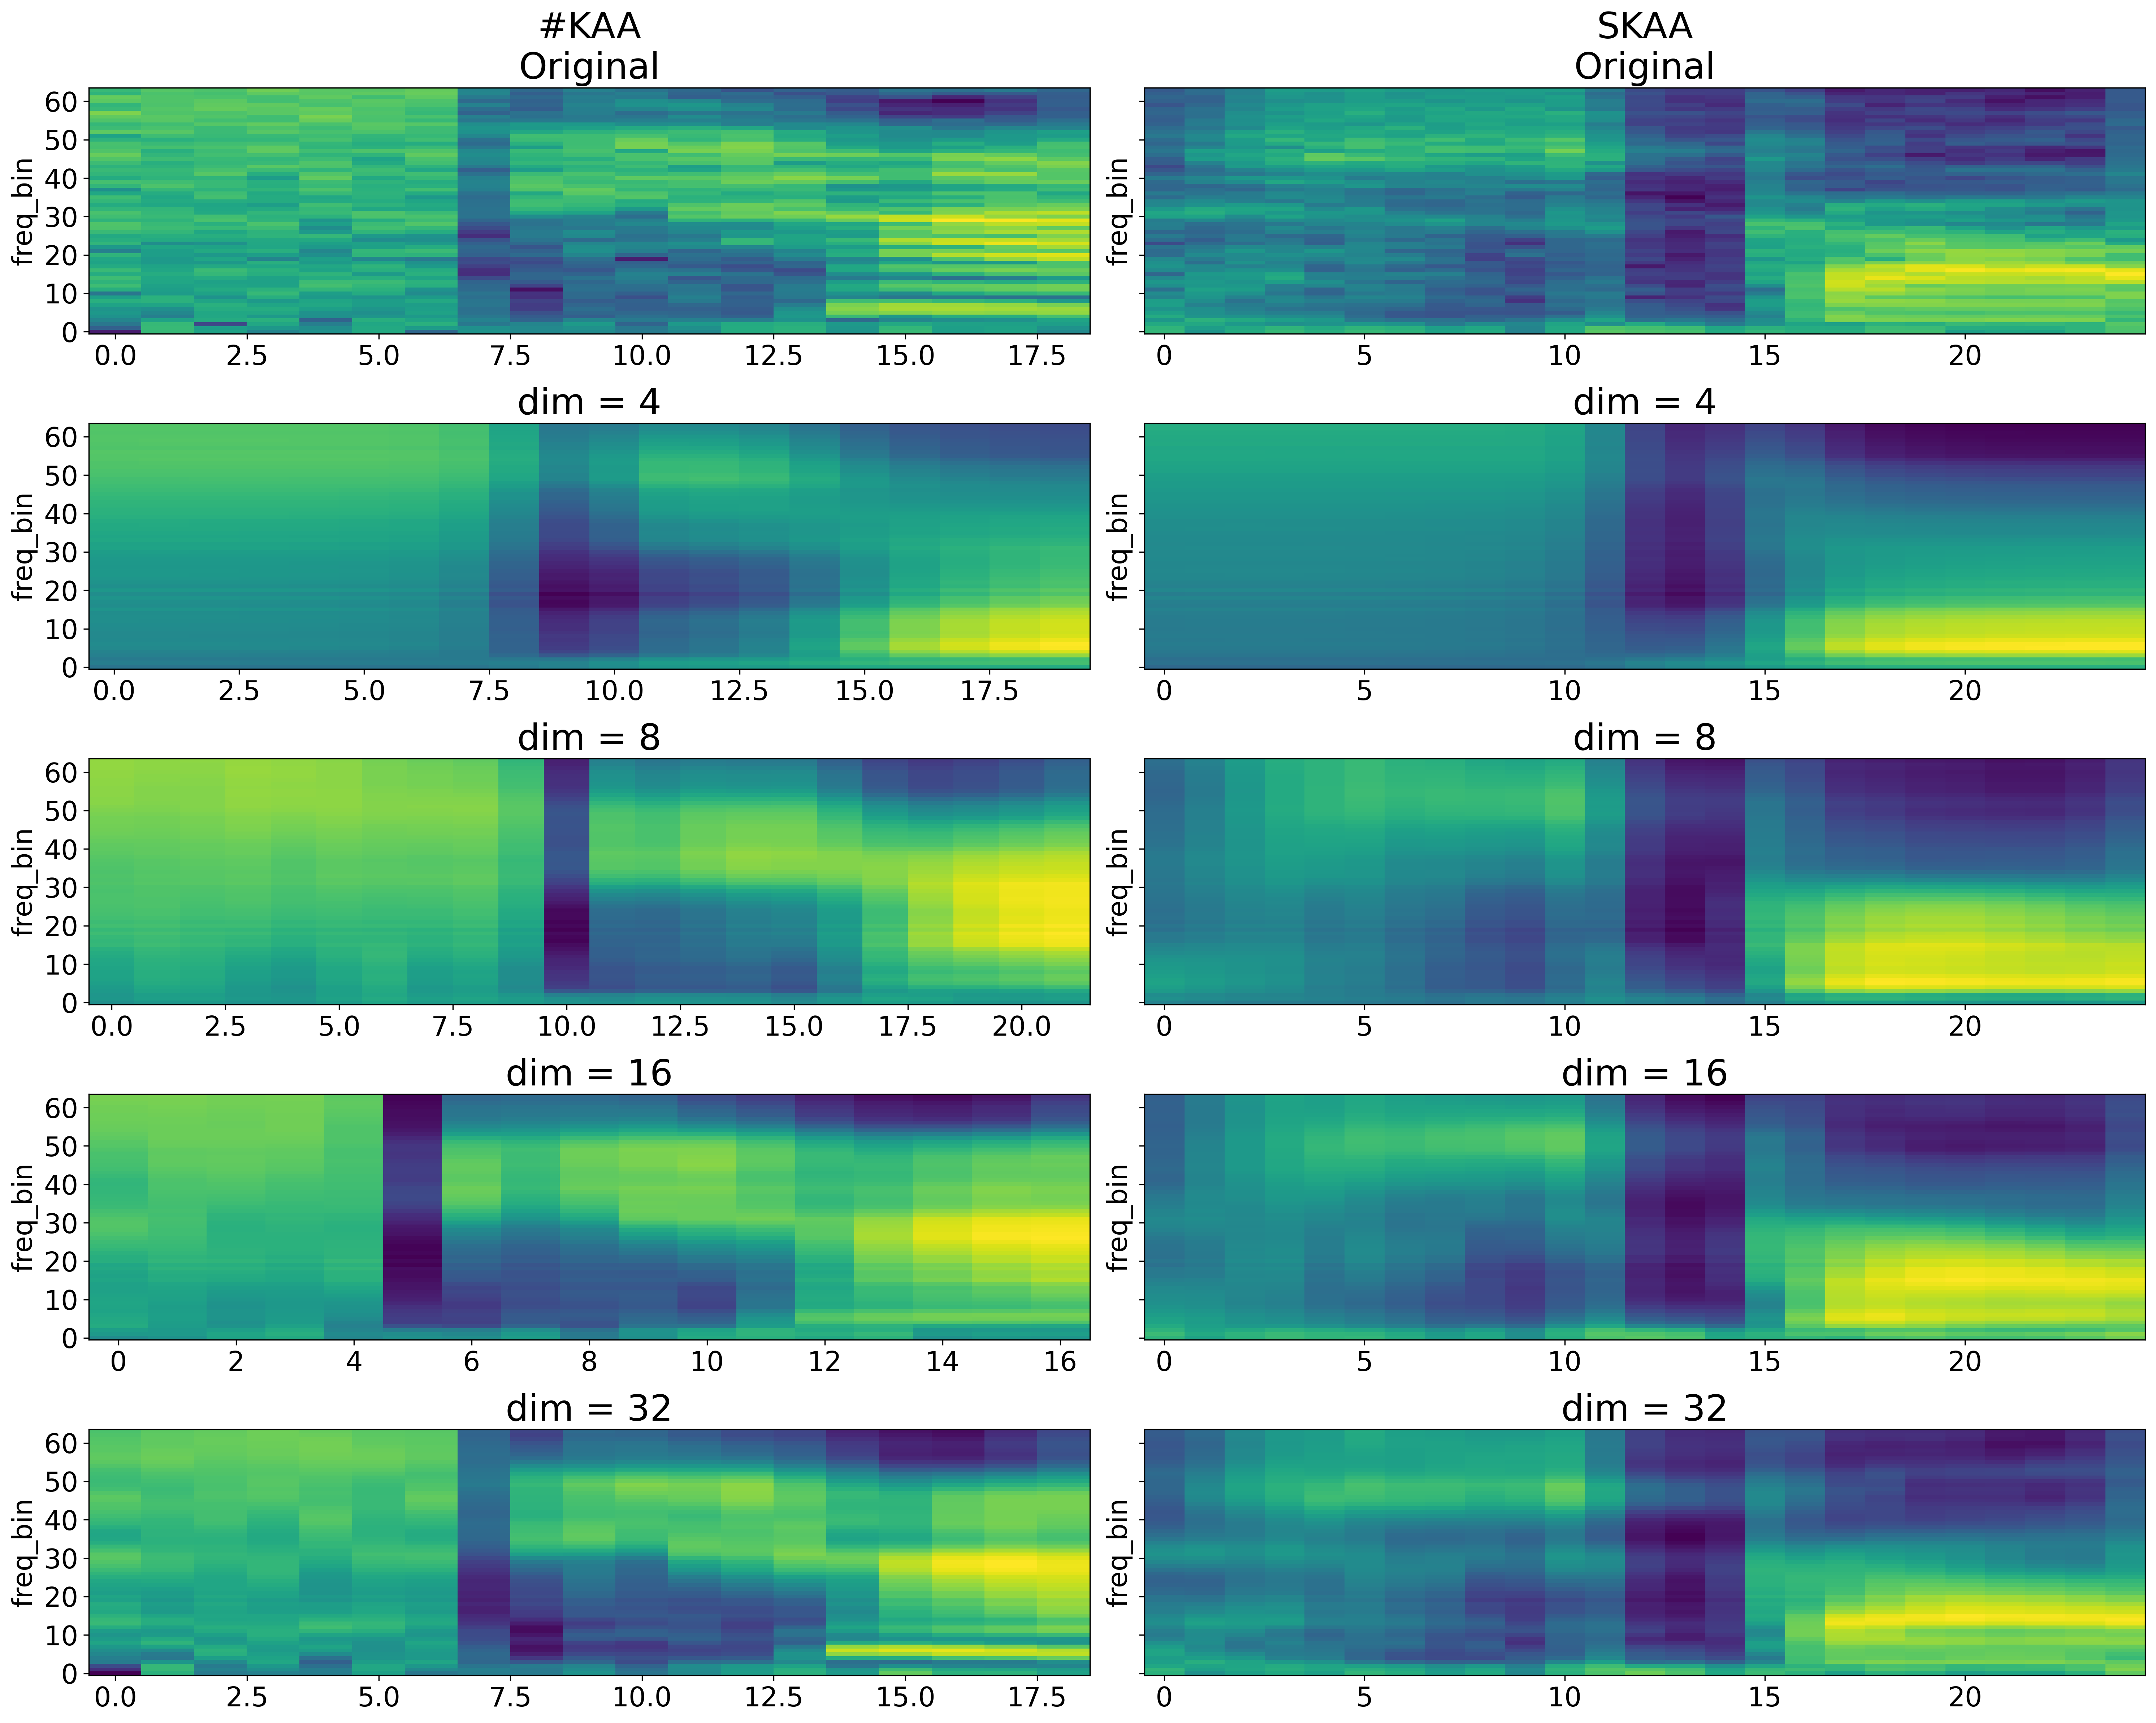

In [29]:
# plt.figure(dpi=300)
st = 59
t = 660
fig, axs = plt.subplots(5, 2, figsize=(20, 16), sharey=True, dpi=300)
for i, plotname in enumerate(["ori", "recon4-phi", "recon8-phi", "recon16-phi", "recon32-phi"]):
    if i == 0: 
        sttitle = get_title(phityperes[st], stopnameres[st], vowelnameres[st]) + "\nOriginal"
        ttitle = get_title(phityperes[t], stopnameres[t], vowelnameres[t]) + "\nOriginal"
    else: 
        num_dim = int(plotname.split("-")[0].split("recon")[1])
        sttitle = f"dim = {num_dim}"
        ttitle = f"dim = {num_dim}"
    plot_spectrogram(alldimresdict[plotname][st].T, title=sttitle, ax=axs[i][0])
    plot_spectrogram(alldimresdict[plotname][t].T, title=ttitle, ax=axs[i][1])
fig.tight_layout()

In [135]:
import matplotlib.patches as mpatches
# plt.figure(dpi=300)
fig, axs = plt.subplots(4, 2, figsize=(24, 32), sharex=True, sharey=True, dpi=300)
for i, (model_type, datadict) in enumerate(alldimresdict.items()): 
    ax1 = axs[i, 0]
    ax2 = axs[i, 1]
    plot_attention_epoch_trajectory_onedim(ax1, ax2, datadict["phi-type"], datadict["attn"], datadict["sep-frame1"], datadict["sep-frame2"], plot_subtitle=(i==0), toptick=False, subsubtitle=datadict["name"])
    # plot_attention_epoch_trajectory_onedim(axs[0, num_dim // 8 - 1], axs[1, num_dim // 8 - 1], datadict["phi-type"], datadict["attn"], datadict["sep-frame1"], datadict["sep-frame2"], plot_subtitle=True, toptick=True)
    print(f"Done plotting {model_type}")

# fig.text(0.25, 1.06, f"dim = 4\ndim = 8", ha='center', fontsize=56)
fig.text(0.5, -0.01, f"Epochs", ha='center', fontsize=48)
fig.text(1.01, 0.5, f"Summed Foreign-Attention", ha='center', va="center", fontsize=48, rotation=270)

# legend_namess = [['S-to-P', 'P-to-S', 'P-to-V', 'V-to-P'], ['#-to-P', 'P-to-#', 'P-to-V', 'V-to-P']]
# colors = ['b', 'g', 'red', 'orange']

# s2p = mpatches.Patch(color='b', label='S/#-to-P')
# p2s = mpatches.Patch(color='g', label='P-to-S/#')
# p2v = mpatches.Patch(color='red', label='P-to-V')
# v2p = mpatches.Patch(color='orange', label='V-to-P')

# plt.legend(handles=[red_patch, blue_patch])
# fig.legend(handles=[s2p, p2s, p2v, v2p], loc="upper center", fontsize=48, ncol=2)
plt.tight_layout()  # leave space for subtitles
# plt.subplots_adjust(wspace=0, hspace=0.1)  # remove space between subplots
plt.show()
# plt.savefig(os.path.join(things_save_dir, f"attnepochtraj-all-all-{strseq_learned_runs}-1.png"), dpi=300)

(4, 100) (4, 100) (4, 100)
(4, 100) (4, 100) (4, 100)
badcounts: {'ST': 0, 'T': 0}
totalcounts: {'ST': 235200, 'T': 235200}
Done plotting recon4-phi
(4, 100) (4, 100) (4, 100)
(4, 100) (4, 100) (4, 100)
badcounts: {'ST': 0, 'T': 0}
totalcounts: {'ST': 235200, 'T': 235200}
Done plotting recon8-phi
(4, 100) (4, 100) (4, 100)
(4, 100) (4, 100) (4, 100)
badcounts: {'ST': 0, 'T': 0}
totalcounts: {'ST': 235200, 'T': 235200}
Done plotting recon16-phi
(4, 100) (4, 100) (4, 100)
(4, 100) (4, 100) (4, 100)
badcounts: {'ST': 0, 'T': 0}
totalcounts: {'ST': 235200, 'T': 235200}
Done plotting recon32-phi


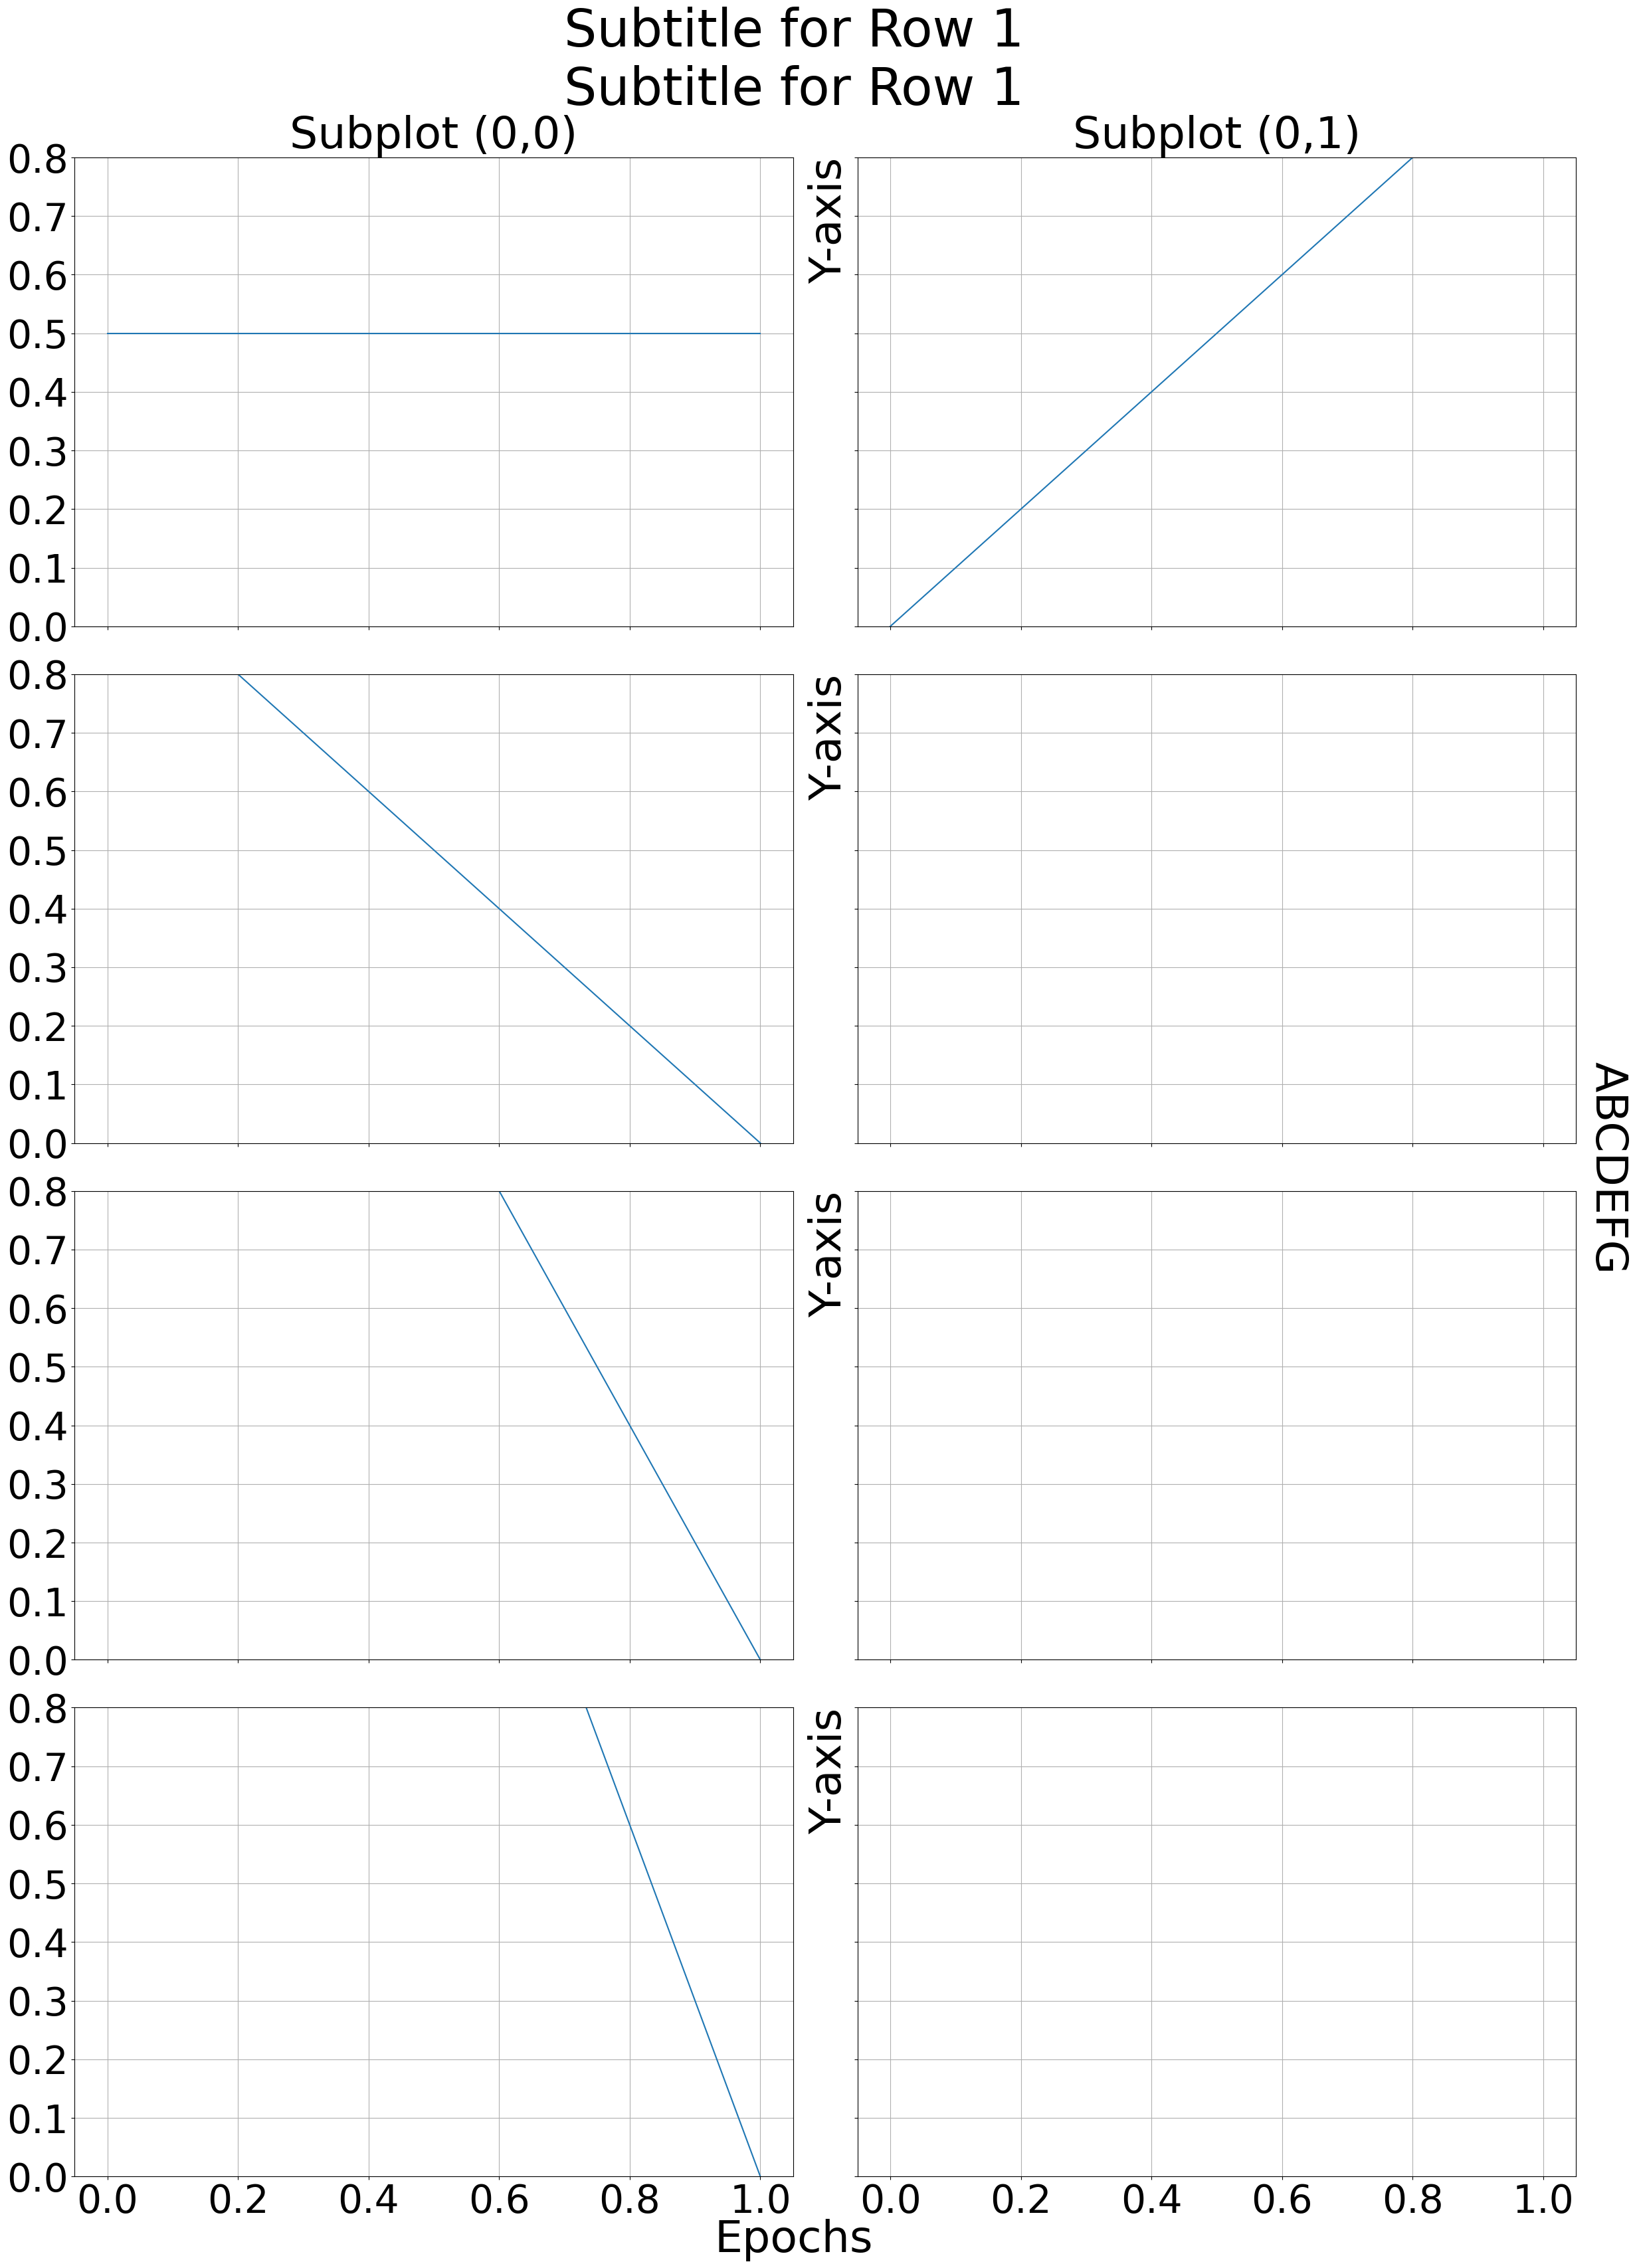

In [132]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

# Create a figure and a 4x2 grid of subplots
fig, axs = plt.subplots(4, 2, figsize=(24, 32), sharex=True, sharey=True)

# Loop over each subplot
for i in range(4):
    for j in range(2):
        ax = axs[i, j]
        ax.grid(True)
        # Plot example data
        if i == 0 and j == 0: 
            ax.plot([0, 1], [0.5, 0.5])
        else: 
            ax.plot([0, 1], [i, j])
        if i == 0: 
            ax.set_title(f"Subplot ({i},{j})", fontdict={"fontsize": 48})
            # if j == 0: 
            #     ax.legend(loc="upper left")
        if j == 1: 
            ax.set_ylabel("Y-axis", fontdict={"fontsize": 48}, loc="top")
        # elif i == 1: 
        #     ax.xaxis.set_ticks_position('top')
        labels = ax.get_xticklabels() + ax.get_yticklabels()
        [label.set_fontsize(42) for label in labels]
        ax.set_ylim([0, 0.8])

# # Add subtitles above each row
# for i in range(4):
fig.text(0.5, 1, f"Subtitle for Row {1}\nSubtitle for Row {1}", ha='center', fontsize=56)
fig.text(0.5, -0.01, f"Epochs", ha='center', fontsize=48)
fig.text(1.01, 0.5, f"ABCDEFG", ha='center', va="center", fontsize=48, rotation=270)
# fig.text(0.25, 0, f"Subtitle for Row {2}", ha='center', fontsize=16)
# plt.figtext(0.5, 0.95, "Comparison of Foreign-Attention Trajectory", ha='center', va='center', fontdict=font)
# Adjust layout to prevent overlap
red_patch = mpatches.Patch(color='red', label='The red data')
blue_patch = mpatches.Patch(color='blue', label='The blue data')
green_patch = mpatches.Patch(color='green', label='The green data')
orange_patch = mpatches.Patch(color='orange', label='The orange data')

# plt.legend(handles=[red_patch, blue_patch])
# fig.legend(handles=[red_patch, blue_patch, green_patch, orange_patch], loc="upper center", fontsize=48, ncol=2)
plt.tight_layout()  # leave space for subtitles
# plt.subplots_adjust(wspace=0, hspace=0.1)  # remove space between subplots
plt.show()
# plt.savefig(os.path.join(things_save_dir, f"attnepochtraj-all-all-{strseq_learned_runs}-1.png"), dpi=1200)